# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [1]:
from xml.etree import ElementTree as ET

## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [2]:
document_tree = ET.parse( './data/mondial_database_less.xml' )

In [3]:
# print names of all countries
for child in document_tree.getroot():
    print child.find('name').text

Albania
Greece
Macedonia
Serbia
Montenegro
Kosovo
Andorra


In [4]:
# print names of all countries and their cities
for element in document_tree.iterfind('country'):
    print '* ' + element.find('name').text + ':',
    capitals_string = ''
    for subelement in element.getiterator('city'):
        capitals_string += subelement.find('name').text + ', '
    print capitals_string[:-2]

* Albania: Tirana, Shkodër, Durrës, Vlorë, Elbasan, Korçë
* Greece: Komotini, Kavala, Athina, Peiraias, Peristeri, Acharnes, Patra, Kozani, Kerkyra, Ioannina, Thessaloniki, Iraklio, Chania, Ermoupoli, Rhodes, Tripoli, Lamia, Chalkida, Larissa, Volos, Mytilini, Karyes
* Macedonia: Skopje, Kumanovo
* Serbia: Beograd, Novi Sad, Niš
* Montenegro: Podgorica
* Kosovo: Prishtine
* Andorra: Andorra la Vella


****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [5]:
#Exercise 1: 10 countries with the lowest infant mortality rates
document = ET.parse( './data/mondial_database.xml' )
import pandas as pd

countries=[]
mortality=[]
dfs= pd.DataFrame()
for element in document.iterfind('country'):
        country=element.find('name').text
        countries.append(country)
        try:
            infant_mortality=element.find('infant_mortality').text
            mortality.append(float(infant_mortality))
            
        except:
            infant_mortality="NAN"
            mortality.append(float(infant_mortality))
            continue
df=pd.DataFrame({"Countries":countries, "Infant mortality":mortality})
df.sort(["Infant mortality"],ascending=True).head(10)

,Countries,Infant mortality
38,Monaco,1.81
98,Japan,2.13
117,Bermuda,2.48
36,Norway,2.48
106,Singapore,2.53
37,Sweden,2.60
10,Czech Republic,2.63
78,Hong Kong,2.73
79,Macao,3.13
44,Iceland,3.15


In [6]:
#Exercise 2: 10 cities with the largest population


In [7]:
%pylab inline 
import sys
reload(sys)  
sys.setdefaultencoding('utf8')

In [8]:
tree = ET.parse('./data/mondial_database.xml')
root = tree.getroot()

#create lists to store the data for lately built the dataframe up.
city_list=[]
year_list=[]
popu_list=[]

    
for element in root.iter('country'): #go to node country

    for city in element.iter('city'): #go to the child city
        cities=city.find('name').text # take the name of the city
        for pop in city.iter(): 
            if pop.tag == 'population': #take only the population elements
                city_list.append(cities) #fill the lists above created with the city names
                year_list.append(int(pop.attrib.get('year'))) #fill the year_list with the atributes of the population atribute Year. 
                popu_list.append(int(pop.text)) #fill the population list with the population   

                
#put the lists together into a dataframe
dfcaca=pd.DataFrame({'City':city_list, 'Year':year_list, 'Population':popu_list})
            #print pop.find('population').text

#to report the cities with the largest population we only consider the last measurement for 
#each city. Therefore, we only take the last population data and the rest are remevoed.  
NoDupli=dfcaca.sort(['Year','Population'],ascending=True).drop_duplicates(['City'],take_last=True)
#Finally the dataframe is sorted by population:
NoDupli.sort(['Population'],ascending=False).head(10).set_index(['City'])

,Population,Year
City,,
Shanghai,22315474,2010
Istanbul,13710512,2012
Mumbai,12442373,2011
Moskva,11979529,2013
Beijing,11716620,2010
São Paulo,11152344,2010
Tianjin,11090314,2010
Guangzhou,11071424,2010
Delhi,11034555,2011


In [9]:
len(popu_list)

9320

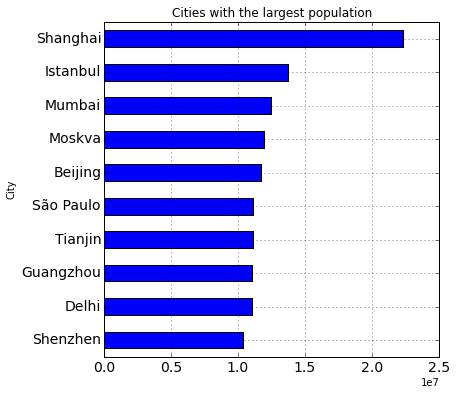

In [10]:
#ploting it!
Top10=NoDupli.sort(['Population'],ascending=False).head(10).set_index(['City'])


Top10.sort(['Population']).plot(kind='barh', stacked=True,title="Cities with the largest population", figsize=(6, 6), legend=False, fontsize=14 )


In [12]:
#Exercise 3: 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)

#create lists to store the data for country, ethnic group and percentage to build later a dataframe.
county_list=[]
ethnics_list=[]
percentage_list=[]
countries_popus=[]
popu_country=[]
popu_year=[]


for element in root.iter('country'): #go to node country
    countries=element.find('name').text
    for pop in element.iter(): 
            
            if pop.tag == 'population': #take only the population elements
                countries_popus.append(countries)
                popu_year.append(int(pop.attrib.get('year'))) #fill the year_list with the atributes of the population atribute Year. 
                popu_country.append(int(pop.text)) #fill the population list with the population
            elif pop.tag == 'city' or pop.tag == 'province':
                break

    for items in element.iter():      
        if items.tag == 'ethnicgroup':#take only the ethnicgroup elements
            county_list.append(countries)# put the country name in the proper list
            percentage_list.append(float(items.attrib.get("percentage")))
            ethnics_list.append(items.text)

#build two dataframes with info about ethnic groups, Country and percentage (Eth_per_country) 
# and a second one with the populations(popu_year).

Eth_per_country= pd.DataFrame({"Country":county_list, "Ethnic_list":ethnics_list, "percentage_list":percentage_list})
popu_year=pd.DataFrame({"countries_popus":countries_popus,"popu_country":popu_country, "popu_year": popu_year})

#We have to clean the popu_year data frame. That object contains the county's populations 
# together with those measured for cities and this is not convinient for us. 
#Though a conditional index we select only the latest estimation of population number.
C=[]
P=[]

for i in popu_year.countries_popus.unique():
    
    #filter by country
    data=popu_year[popu_year.countries_popus==i].sort("popu_year", ascending=False )
    C.append(i)
    
    #Best population approach taking the last population meassurement
    BPA=data[data["popu_year"] == data.popu_year.max()].popu_country
    P.append(int(BPA))
    
#Mixing the C and P lists into a DataFrame structure;
CP_DF=pd.DataFrame({"Country":C, "Population": P})

#CP_DF.head(2)

# The two data frames: Eth_per_country and CP_DF, are merged to make easy the analysis.
sub1 = pd.DataFrame.merge(Eth_per_country.sort("Country"), CP_DF.sort("Country"))

# and we add a new column comming from multiply percentage_list to Population (call # of people)
sub1.loc[:,'num_of_People'] = pd.Series((sub1.percentage_list/100)*sub1.Population, index=sub1.index)

#sub1.head(2)

In [13]:
# The two data frames: Eth_per_country and CP_DF, are merged to make easy the analysis.
sub1 = pd.DataFrame.merge(Eth_per_country.sort("Country"), CP_DF.sort("Country"))

# and we add a new column comming from multiply percentage_list to Population (call # of people)
sub1.loc[:,'num_of_People'] = pd.Series((sub1.percentage_list/100)*sub1.Population, index=sub1.index)

#sub1.head(2)

In [14]:
# Hereunder we are going to work only with the columns Ethnic_list and num_of_People. Therefore the sub2 dataframe
# is created by applying filters to the previous sub1 object. 
sub2=sub1[["Ethnic_list", "num_of_People"]]#.set_index("Ethnic_list")

#Finally, the sub2 Ethnic names are grouped using the function .groupby() giving rise to the dataframe that contais 
# the 10 ethnic groups with the largest overall populations:
Final=sub2.groupby("Ethnic_list")[["num_of_People"]].sum()
Final.sort("num_of_People", ascending=False).head(10)

,num_of_People
Ethnic_list,
Han Chinese,1.245059e+09
Indo-Aryan,8.718156e+08
European,4.948722e+08
African,3.183251e+08
Dravidian,3.027137e+08
Mestizo,1.577344e+08
Bengali,1.467769e+08
Russian,1.318570e+08
Japanese,1.265342e+08


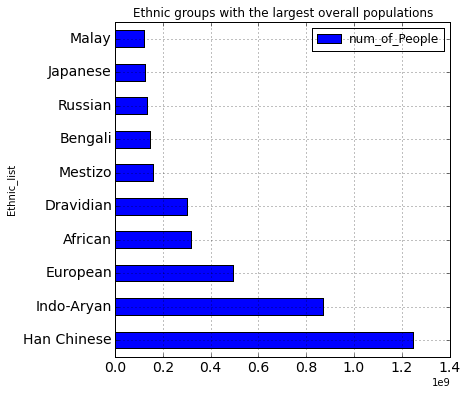

In [15]:
#Lets plot it! 
a=Final.sort("num_of_People", ascending=False).head(10)
a.plot(kind='barh', stacked=True, title="Ethnic groups with the largest overall populations", figsize=(6, 6), legend=True, fontsize=14 )


In [171]:
#Exercise4: name and country of a) longest river, b) largest lake and c) airport at highest elevation

# This is a list
table= pd.read_html('https://en.wikipedia.org/wiki/List_of_rivers_by_length')

# this is a Dataframe
rivers=table[5]#.set_index(1)
rivers.columns = ['River','Name', 'Length_(km)','Length (miles)','Drainage area (km²)','Average discharge (m³/s)','Outflow','Countries_in_the_drainage_basin']

#Drop the first row which shows the index twice
rivers=rivers.drop(rivers.head(1).index)

#rivers.head(4)
#Sort by length and filter by name, length and countries
rivers.sort('Length_(km)', ascending=False).head(1)[['Name','Countries_in_the_drainage_basin']]


,Name,Countries_in_the_drainage_basin
4,Mississippi–Missouri–Jefferson,"United States (98.5%), Canada (1.5%)"


In [ ]:
# Exercise4 b) largest lake

In [155]:
tableb= pd.read_html('https://en.wikipedia.org/wiki/List_of_lakes_by_area')

Lakes=tableb[1]
Lakes.columns = ['NaN','Name', 'Countries','Area','Length','Maximum_depth','Water_volume','Thumbnail', 'Notes']
Lakes.set_index('Name')
#Drop the first row which shows the index twice
Lakes=Lakes.drop(Lakes.head(1).index)#.set_index('Name')
#Lakes.head(1)

Lakes.sort('Length', ascending=False).head(1)[['Name','Countries']]

,Name,Countries
1,Caspian Sea*,Kazakhstan Russia Turkmenistan Azerbaijan ...


In [ ]:
# Exercise4 c) airport at highest elevation

In [167]:
tablec= pd.read_html('https://en.wikipedia.org/wiki/List_of_highest_commercial_airports')
airports=tablec[0]

airports.columns = ['Airport_Name', 'Countries','Coordinates ','Elevation(m)','Elevation(ft)']
airports=airports.drop(airports.head(1).index)#.set_index('Name')
airports.sort("Elevation(m)",ascending=False).head(1)[["Airport_Name","Countries"]] 

,Airport_Name,Countries
1,Daocheng Yading Airport,China
